In [30]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import librosa.display
#import librosa.power_to_db

In [31]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp, sr=None)
        print(X.shape)
        raw_sounds.append(X)
        print(sr)
    return sr,raw_sounds

In [32]:
def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        print('going to plot',f)
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot')
    plt.show()

In [33]:
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram')
    plt.show()

In [34]:
def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        D = librosa.power_to_db(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram')
    plt.show()

In [35]:
def plot_mel_specgram(sound_names,raw_sounds,save=False):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        print(n,f)
        S = librosa.feature.melspectrogram(f, sr=22050, n_mels=128)
        melogram=librosa.power_to_db(S, ref=np.max)
        librosa.display.specshow(melogram)
        if (save):
            print(n.title())
            #print(melogram.shape)
            filename, file_extension = os.path.splitext(n)
            np.save(filename, melogram)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 4: Mel spectrogram')
    plt.show()

In [36]:
def plot_delta_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,60))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        #print(n,f)
        S = librosa.feature.melspectrogram(f, sr=22050, n_mels=128)
        melogram=librosa.power_to_db(S, ref=np.max)
        #
        mfcc_delta = librosa.feature.delta(melogram)
        librosa.display.specshow(mfcc_delta)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 5: delta of mel spectrogram')
    plt.show()

In [37]:
def save_mel_specgram(sound_names,raw_sounds,save=False,path=''):
    i = 1
    for n,f in zip(sound_names,raw_sounds):
        print(n,f)
        S = librosa.feature.melspectrogram(f, sr=22050, n_mels=128)
        melogram=librosa.power_to_db(S, ref=np.max)
        if (save):
            print(n.title())
            print(melogram.shape)
            filename, file_extension = os.path.splitext(n)
            np.save(path+filename, melogram)
        i += 1

In [38]:
def save_delta_specgram(sound_names,raw_sounds,save=False,path='', sr=22050):
    i = 1
    for n,f in zip(sound_names,raw_sounds):
        print(n,f)
        S = librosa.feature.melspectrogram(f, sr=22050, n_mels=128)
        melogram=librosa.power_to_db(S, ref=np.max)
        #
        mfcc_delta = librosa.feature.delta(melogram)
        if (save):
            print(n.title())
            print(mfcc_delta.shape)
            filename, file_extension = os.path.splitext(n)
            np.save(path+filename, mfcc_delta)
        i += 1

In [39]:
import os
import re
relevant_path = "./data/cats_dogs/"
# get files from directory and do all or a few, depending on range extracted below
sound_file_paths = [relevant_path+f for f in os.listdir(relevant_path)]
sound_names=sound_file_paths
sound_names_smaller=[]
for x in sound_names:
    sound_names_smaller.append(os.path.basename(x))
print(sound_names_smaller)


['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav', 'cat_103.wav', 'cat_105.wav', 'cat_106.wav', 'cat_107.wav', 'cat_108.wav', 'cat_109.wav', 'cat_11.wav', 'cat_110.wav', 'cat_112.wav', 'cat_113.wav', 'cat_114.wav', 'cat_115.wav', 'cat_116.wav', 'cat_117.wav', 'cat_118.wav', 'cat_119.wav', 'cat_12.wav', 'cat_120.wav', 'cat_121.wav', 'cat_122.wav', 'cat_123.wav', 'cat_124.wav', 'cat_125.wav', 'cat_126.wav', 'cat_127.wav', 'cat_128.wav', 'cat_129.wav', 'cat_13.wav', 'cat_130.wav', 'cat_131.wav', 'cat_132.wav', 'cat_133.wav', 'cat_134.wav', 'cat_135.wav', 'cat_136.wav', 'cat_137.wav', 'cat_138.wav', 'cat_139.wav', 'cat_14.wav', 'cat_140.wav', 'cat_141.wav', 'cat_142.wav', 'cat_143.wav', 'cat_144.wav', 'cat_146.wav', 'cat_147.wav', 'cat_148.wav', 'cat_149.wav', 'cat_15.wav', 'cat_150.wav', 'cat_151.wav', 'cat_152.wav', 'cat_153.wav', 'cat_154.wav', 'cat_155.wav', 'cat_156.wav', 'cat_157.wav', 'cat_158.wav', 'cat_159.wav', 'cat_16.wav', 'cat_160.wav', 'cat_161.wav', 'ca

In [40]:
import audioread
import numpy as np
import scipy.signal
import scipy.fftpack as fft
import resampy
with audioread.audio_open(os.path.realpath(sound_file_paths[0])) as input_file:
        sr_native = input_file.samplerate
        n_channels = input_file.channels
print('sr_native:',sr_native)
print('n_channels:',n_channels)

sr_native: 16000
n_channels: 1


In [41]:
print('going to load:',sound_file_paths)
sr,raw_sounds = load_sound_files(sound_file_paths)
print('sampling rate:',sr)

going to load: ['./data/cats_dogs/cat_1.wav', './data/cats_dogs/cat_10.wav', './data/cats_dogs/cat_100.wav', './data/cats_dogs/cat_101.wav', './data/cats_dogs/cat_102.wav', './data/cats_dogs/cat_103.wav', './data/cats_dogs/cat_105.wav', './data/cats_dogs/cat_106.wav', './data/cats_dogs/cat_107.wav', './data/cats_dogs/cat_108.wav', './data/cats_dogs/cat_109.wav', './data/cats_dogs/cat_11.wav', './data/cats_dogs/cat_110.wav', './data/cats_dogs/cat_112.wav', './data/cats_dogs/cat_113.wav', './data/cats_dogs/cat_114.wav', './data/cats_dogs/cat_115.wav', './data/cats_dogs/cat_116.wav', './data/cats_dogs/cat_117.wav', './data/cats_dogs/cat_118.wav', './data/cats_dogs/cat_119.wav', './data/cats_dogs/cat_12.wav', './data/cats_dogs/cat_120.wav', './data/cats_dogs/cat_121.wav', './data/cats_dogs/cat_122.wav', './data/cats_dogs/cat_123.wav', './data/cats_dogs/cat_124.wav', './data/cats_dogs/cat_125.wav', './data/cats_dogs/cat_126.wav', './data/cats_dogs/cat_127.wav', './data/cats_dogs/cat_128.wav

(150208,)
16000
(20696,)
16000
(184000,)
16000
(182400,)
16000
(192000,)
16000
(190400,)
16000
(192000,)
16000
(192000,)
16000
(30583,)
16000
(93696,)
16000
(192000,)
16000
(20352,)
16000
(287616,)
16000
(79296,)
16000
(132291,)
16000
(233408,)
16000
(190400,)
16000
(177600,)
16000
(134400,)
16000
(69056,)
16000
(179200,)
16000
(32192,)
16000
(66432,)
16000
(85888,)
16000
(100992,)
16000
(17280,)
16000
(127315,)
16000
(192000,)
16000
(168000,)
16000
(182400,)
16000
(89098,)
16000
(176000,)
16000
(19968,)
16000
(25344,)
16000
(243072,)
16000
(22152,)
16000
(20063,)
16000
(19227,)
16000
(94342,)
16000
(16614,)
16000
(19867,)
16000
(15067,)
16000
(185992,)
16000
(15067,)
16000
(15067,)
16000
(63296,)
16000
(161792,)
16000
(79942,)
16000
(192000,)
16000
(192000,)
16000
(192000,)
16000
(67200,)
16000
(47168,)
16000
(33728,)
16000
(62592,)
16000
(188800,)
16000
(192000,)
16000
(162816,)
16000
(31104,)
16000
(33509,)
16000
(96000,)
16000
(24960,)
16000
(192000,)
16000
(112128,)
16000
(192000,

going to plot wav
going to plot [ 0.00378418  0.00326538  0.00021362 ... -0.01663208 -0.01507568
 -0.0161438 ]
going to plot [-0.00024414  0.          0.00012207 ...  0.00280762 -0.00018311
 -0.00219727]
going to plot [-0.00784302 -0.00839233 -0.00775146 ...  0.00494385  0.00411987
  0.0050354 ]
going to plot [-0.00241089 -0.00427246 -0.0039978  ... -0.05651855 -0.07507324
 -0.08380127]
going to plot [-0.00628662 -0.00167847  0.00366211 ... -0.04718018 -0.02554321
  0.00415039]
going to plot [-0.08309937 -0.06994629 -0.05911255 ... -0.05218506 -0.04745483
 -0.04104614]
going to plot [-0.00161743 -0.00106812 -0.00054932 ...  0.01797485  0.02420044
  0.02172852]
going to plot [ 0.1512146   0.09851074 -0.01544189 ...  0.0067749   0.00509644
  0.00717163]
going to plot [0.02108765 0.02001953 0.01861572 ... 0.01733398 0.0227356  0.01275635]
going to plot [-0.02947998 -0.02902222 -0.02746582 ...  0.00045776  0.00042725
  0.00045776]


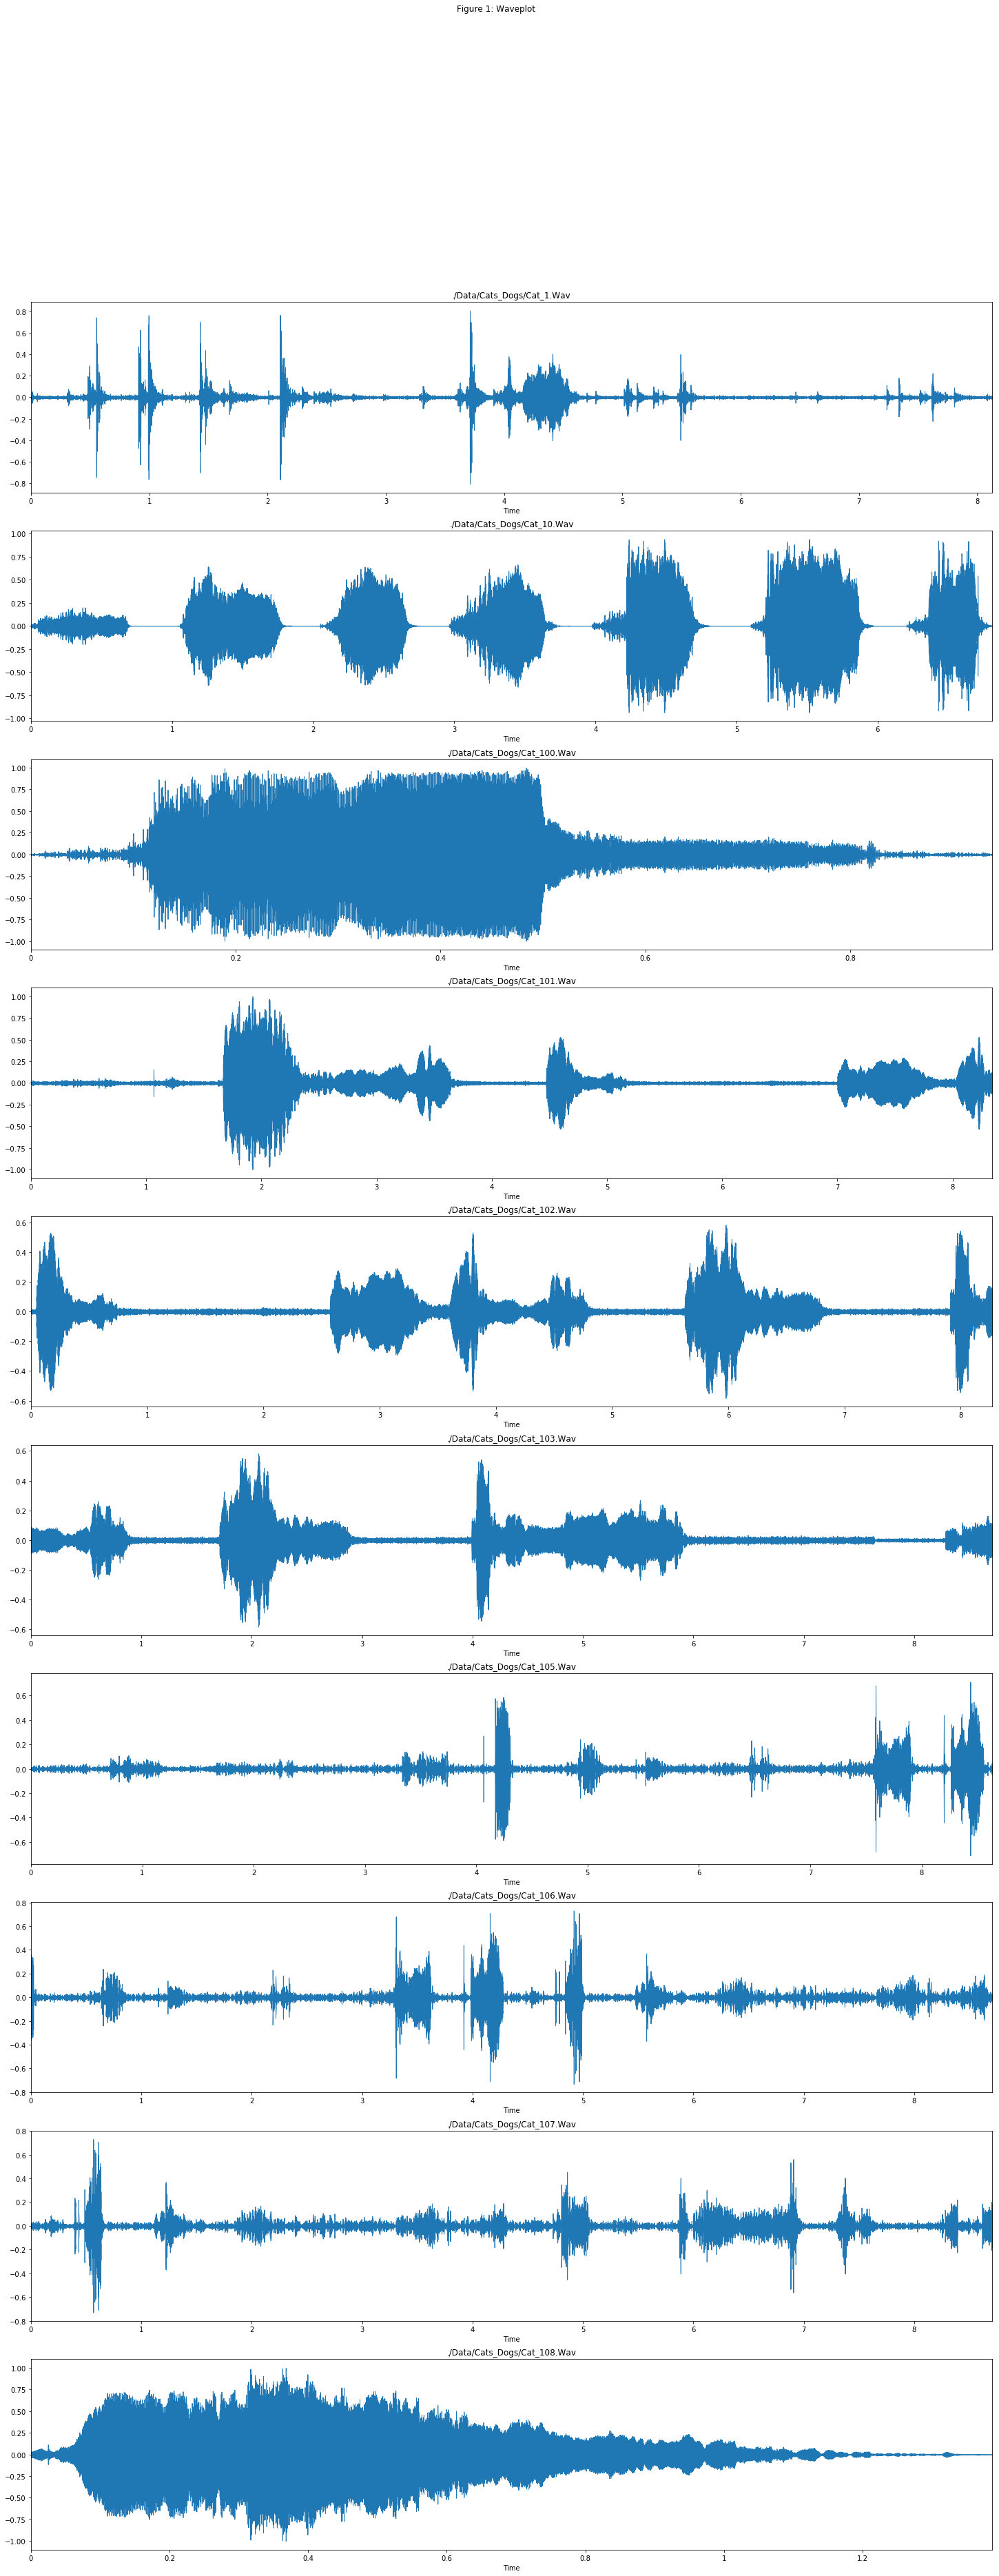

In [42]:
print('going to plot wav')
plot_waves(sound_names[:10],raw_sounds[:10])

going to plot specgram


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


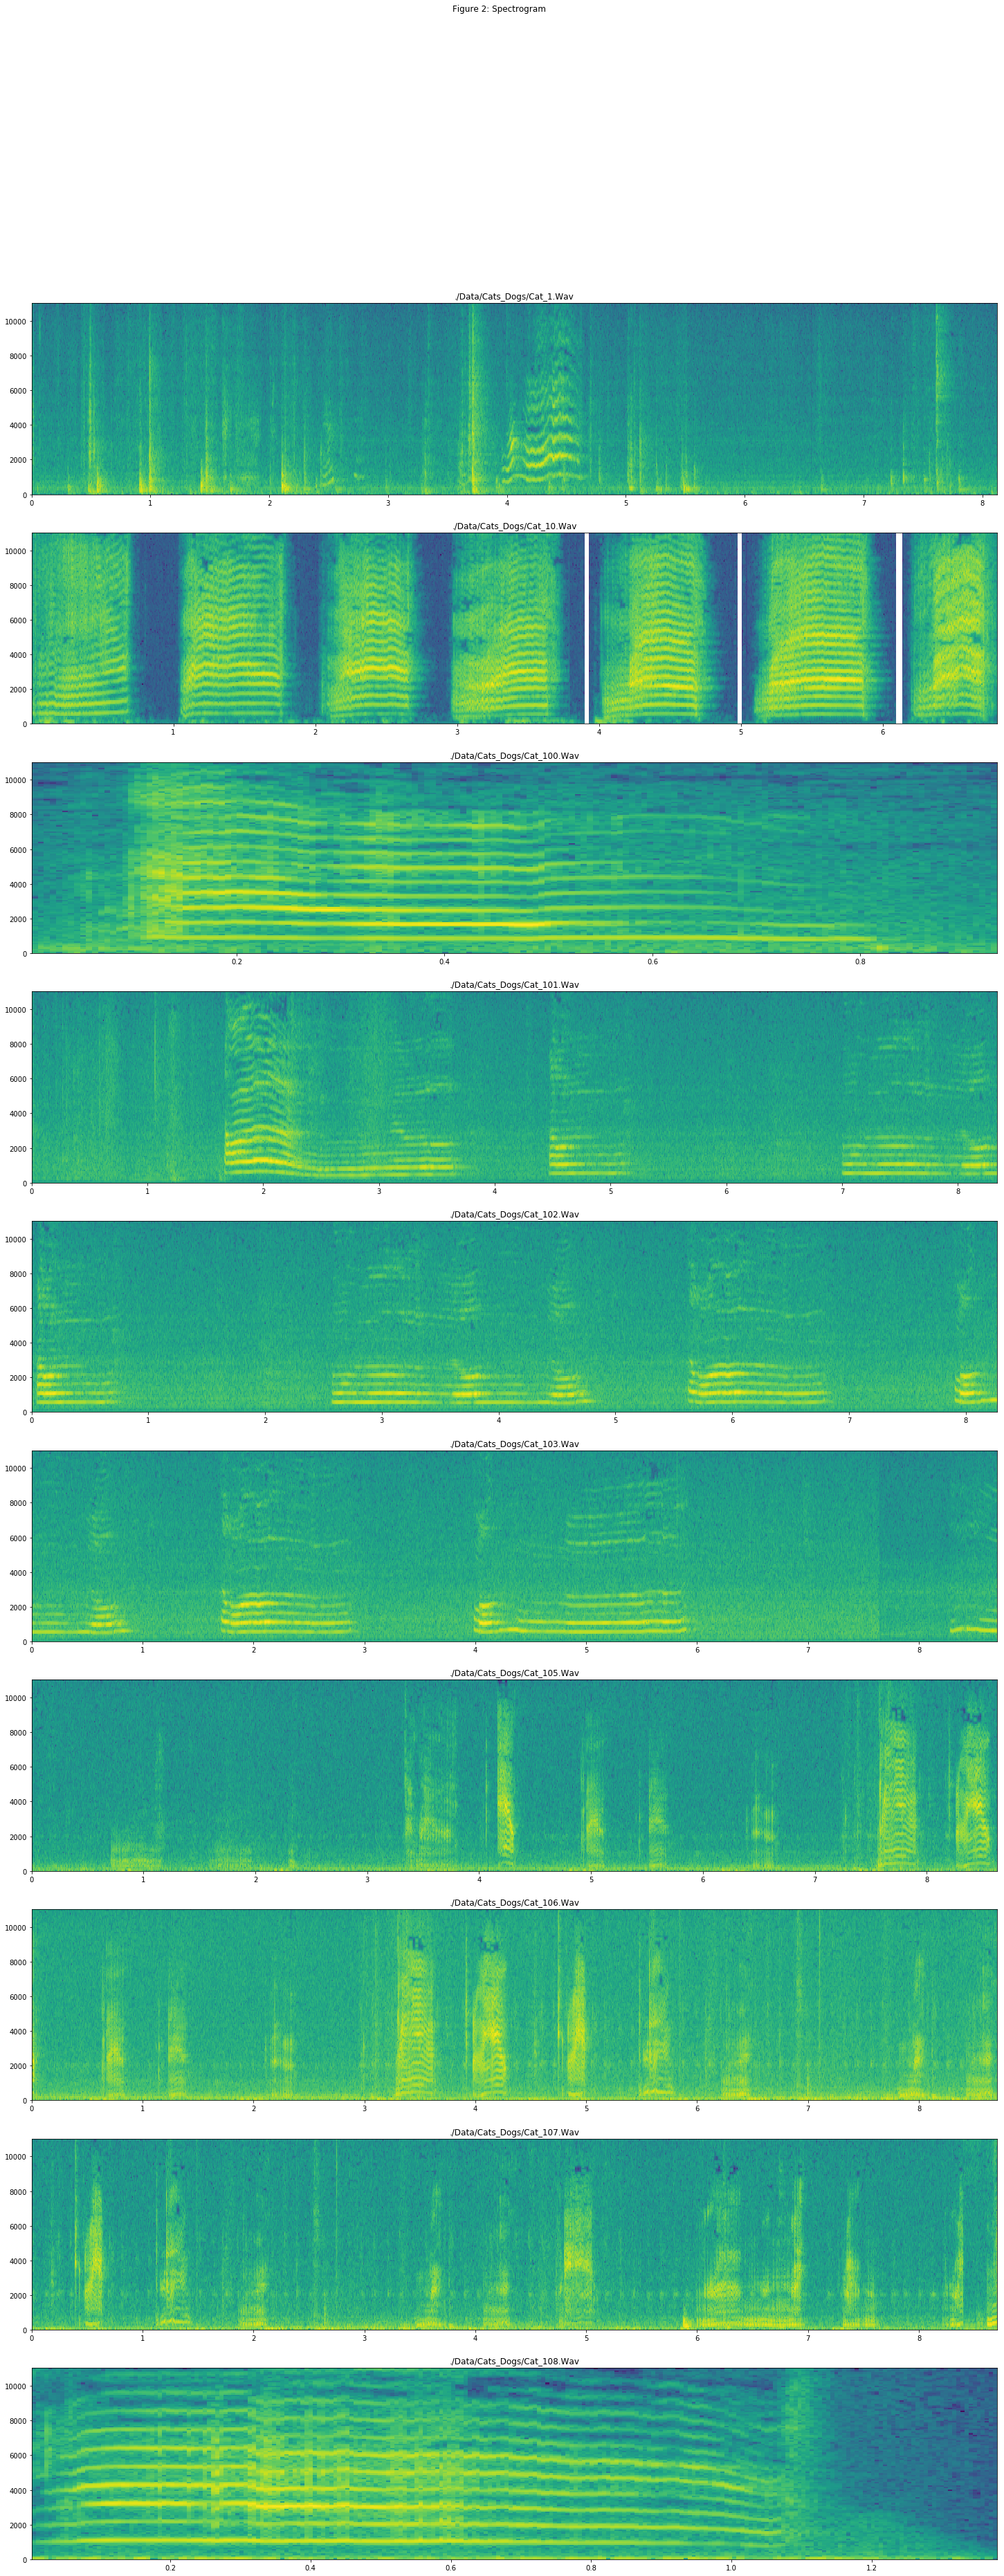

In [43]:
print('going to plot specgram')
plot_specgram(sound_names[:10],raw_sounds[:10])

In [44]:
#print('going to plot log_power_specgram')
#plot_log_power_specgram(sound_names[:10],raw_sounds[:10])

going to plot mel_specgram
./data/cats_dogs/cat_1.wav [ 0.00378418  0.00326538  0.00021362 ... -0.01663208 -0.01507568
 -0.0161438 ]
./data/cats_dogs/cat_10.wav [-0.00024414  0.          0.00012207 ...  0.00280762 -0.00018311
 -0.00219727]
./data/cats_dogs/cat_100.wav [-0.00784302 -0.00839233 -0.00775146 ...  0.00494385  0.00411987
  0.0050354 ]
./data/cats_dogs/cat_101.wav [-0.00241089 -0.00427246 -0.0039978  ... -0.05651855 -0.07507324
 -0.08380127]
./data/cats_dogs/cat_102.wav [-0.00628662 -0.00167847  0.00366211 ... -0.04718018 -0.02554321
  0.00415039]
./data/cats_dogs/cat_103.wav [-0.08309937 -0.06994629 -0.05911255 ... -0.05218506 -0.04745483
 -0.04104614]
./data/cats_dogs/cat_105.wav [-0.00161743 -0.00106812 -0.00054932 ...  0.01797485  0.02420044
  0.02172852]
./data/cats_dogs/cat_106.wav [ 0.1512146   0.09851074 -0.01544189 ...  0.0067749   0.00509644
  0.00717163]
./data/cats_dogs/cat_107.wav [0.02108765 0.02001953 0.01861572 ... 0.01733398 0.0227356  0.01275635]
./data/cats

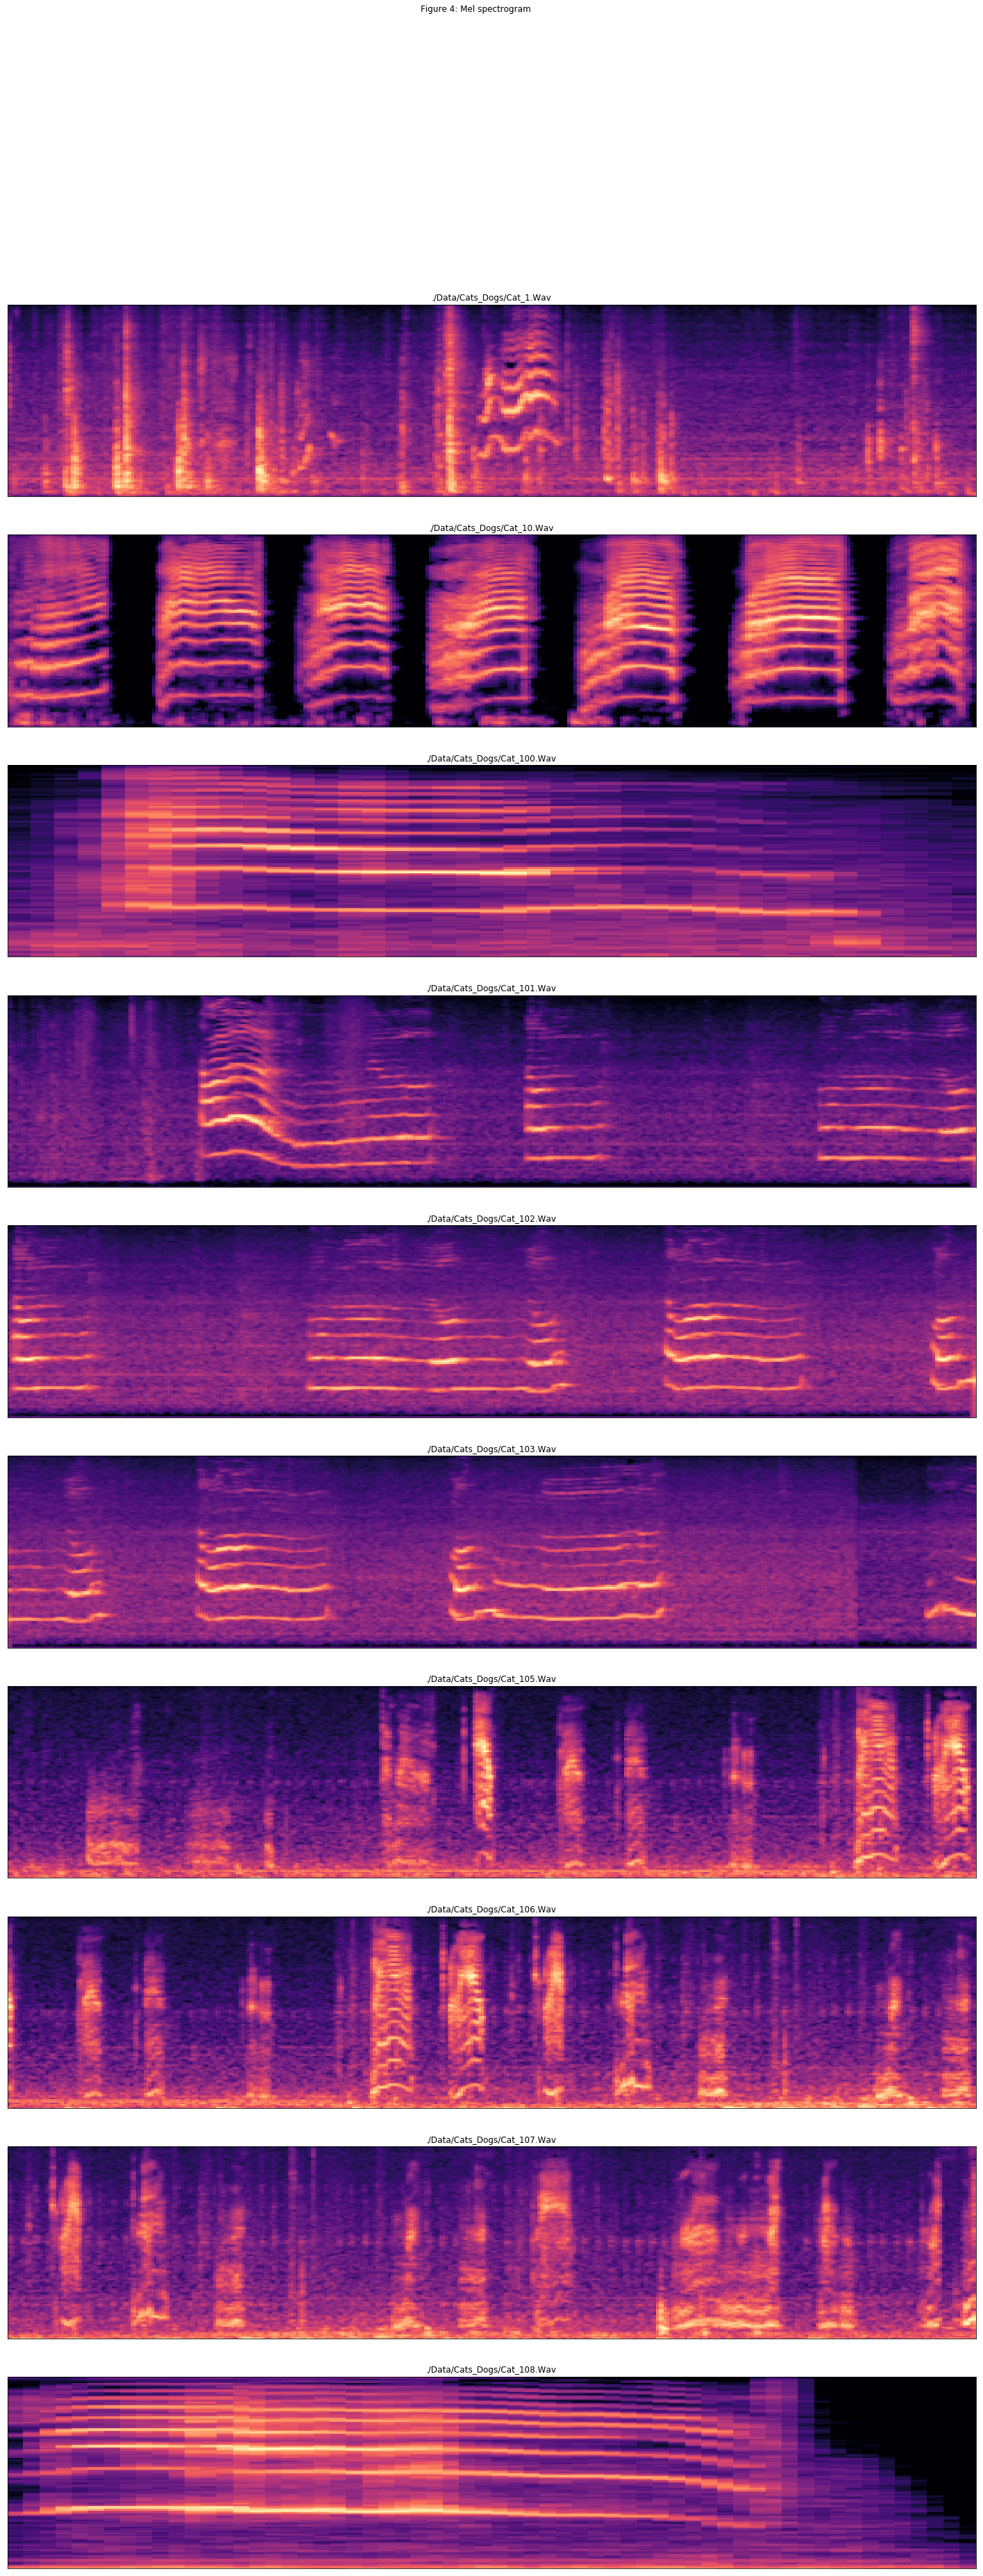

In [45]:
print('going to plot mel_specgram')
plot_mel_specgram(sound_names[:10],raw_sounds[:10],save=False)

going to plot delta mel_specgram


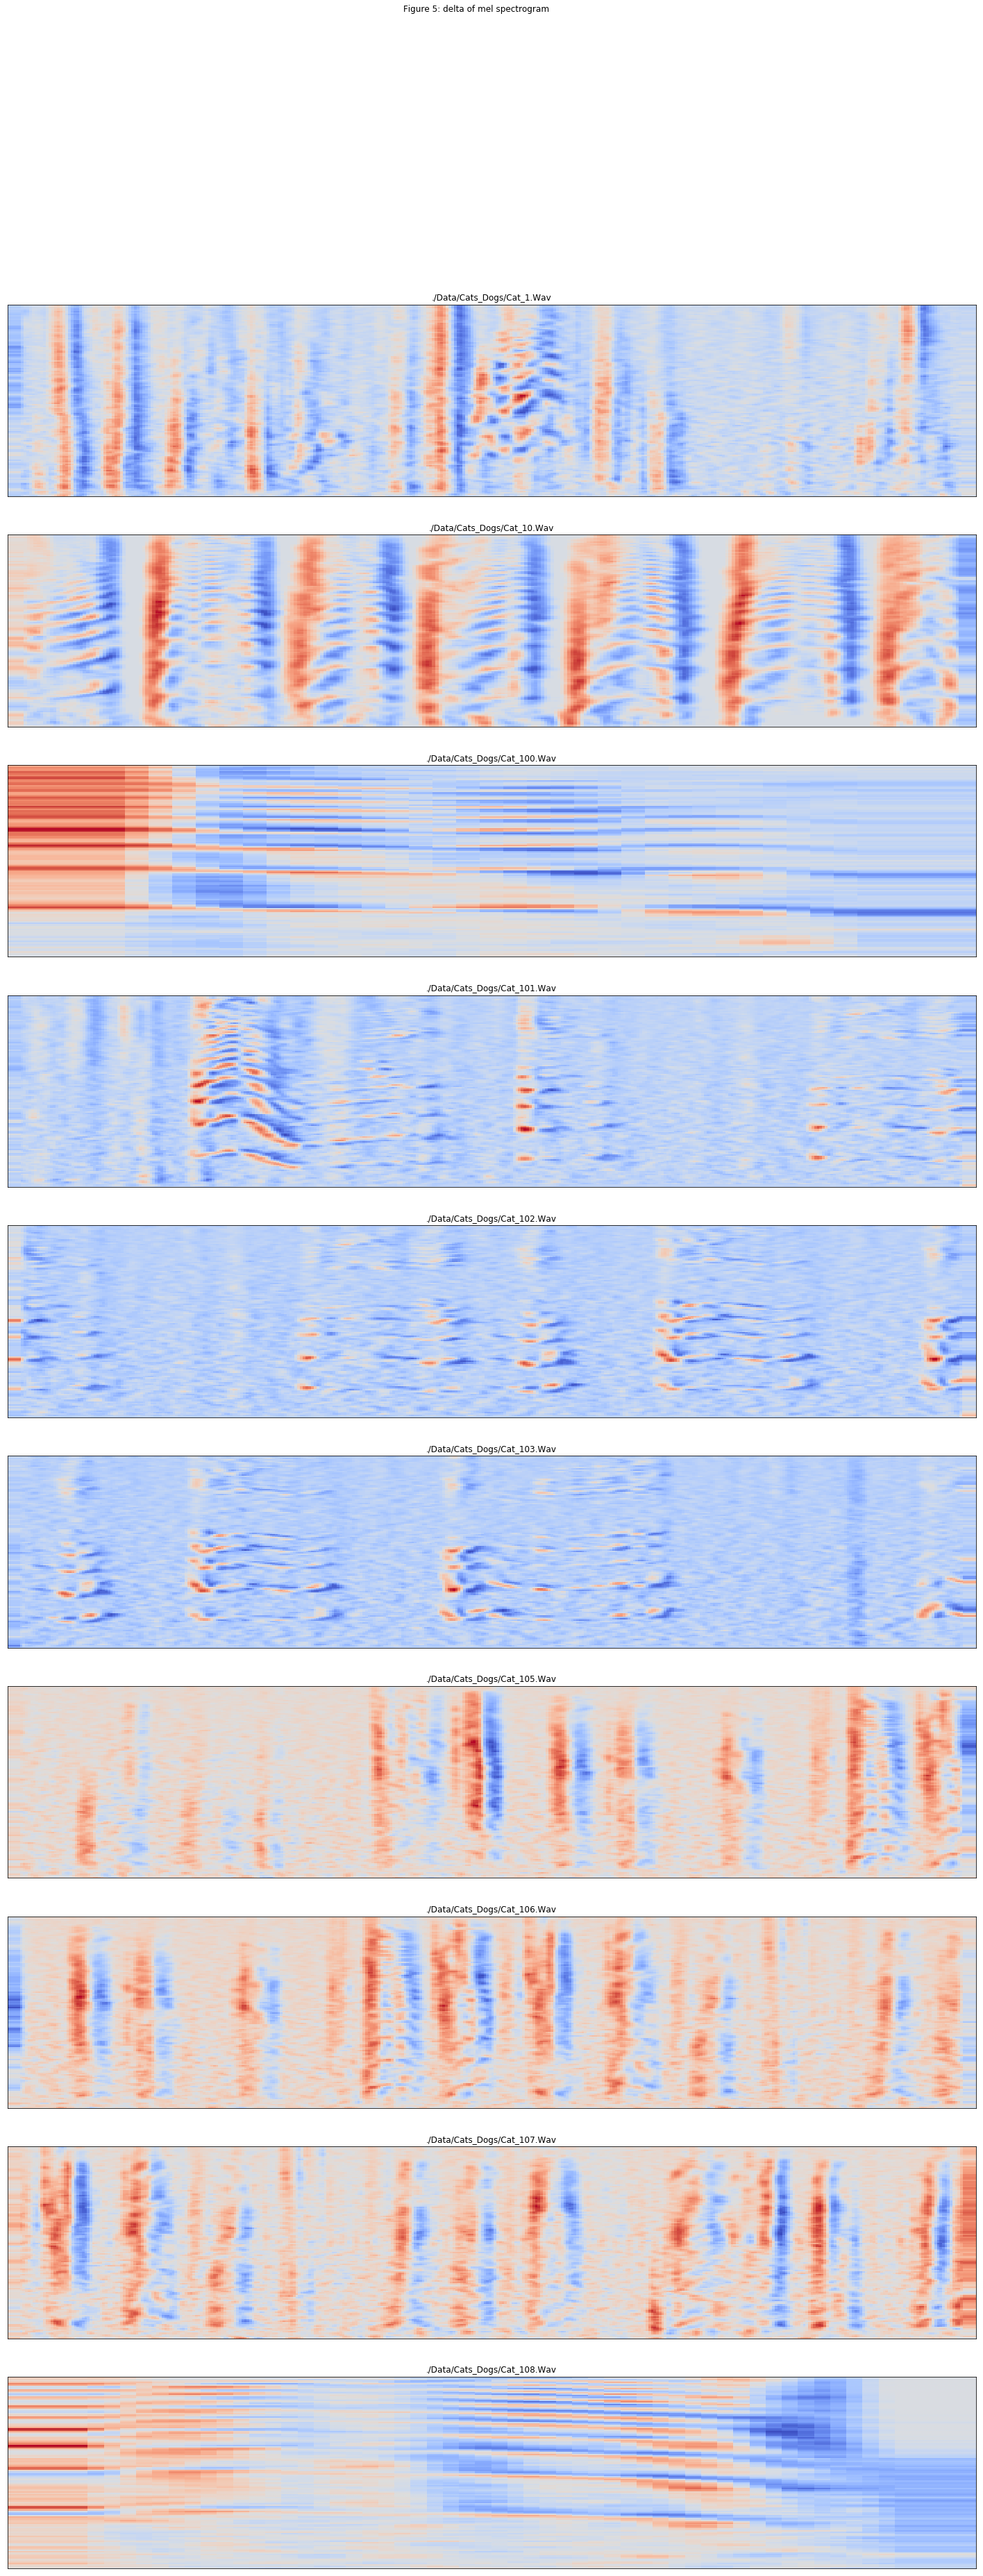

In [46]:
print('going to plot delta mel_specgram')
plot_delta_specgram(sound_names[:10],raw_sounds[:10])

In [47]:
save_mel_specgram(sound_names_smaller,raw_sounds,save=True,path='./features_mel_spectrograms/')


cat_1.wav [ 0.00378418  0.00326538  0.00021362 ... -0.01663208 -0.01507568
 -0.0161438 ]
Cat_1.Wav
(128, 351)
cat_10.wav [-0.00024414  0.          0.00012207 ...  0.00280762 -0.00018311
 -0.00219727]
Cat_10.Wav
(128, 294)
cat_100.wav [-0.00784302 -0.00839233 -0.00775146 ...  0.00494385  0.00411987
  0.0050354 ]
Cat_100.Wav
(128, 41)
cat_101.wav [-0.00241089 -0.00427246 -0.0039978  ... -0.05651855 -0.07507324
 -0.08380127]
Cat_101.Wav
(128, 360)
cat_102.wav [-0.00628662 -0.00167847  0.00366211 ... -0.04718018 -0.02554321
  0.00415039]
Cat_102.Wav
(128, 357)
cat_103.wav [-0.08309937 -0.06994629 -0.05911255 ... -0.05218506 -0.04745483
 -0.04104614]
Cat_103.Wav
(128, 376)
cat_105.wav [-0.00161743 -0.00106812 -0.00054932 ...  0.01797485  0.02420044
  0.02172852]
Cat_105.Wav
(128, 372)
cat_106.wav [ 0.1512146   0.09851074 -0.01544189 ...  0.0067749   0.00509644
  0.00717163]
Cat_106.Wav
(128, 376)
cat_107.wav [0.02108765 0.02001953 0.01861572 ... 0.01733398 0.0227356  0.01275635]
Cat_107.Wav

Cat_167.Wav
(128, 376)
cat_17.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  2.0446777e-02
 -2.8381348e-03 -9.0637207e-03]
Cat_17.Wav
(128, 48)
cat_18.wav [-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -5.5786133e-02
 -4.4952393e-02 -2.1545410e-02]
Cat_18.Wav
(128, 42)
cat_19.wav [ 0.          0.          0.         ... -0.00036621 -0.00045776
 -0.00073242]
Cat_19.Wav
(128, 40)
cat_2.wav [-3.1372070e-02 -3.1707764e-02 -3.2470703e-02 ...  1.8310547e-04
  1.1596680e-03  6.1035156e-05]
Cat_2.Wav
(128, 376)
cat_20.wav [ 0.0007019   0.00076294  0.00094604 ... -0.00131226 -0.00109863
 -0.00088501]
Cat_20.Wav
(128, 55)
cat_21.wav [-0.00921631 -0.00091553  0.00262451 ...  0.00820923  0.0067749
  0.00650024]
Cat_21.Wav
(128, 369)
cat_22.wav [ 0.01464844  0.01168823  0.00372314 ... -0.00292969 -0.00119019
 -0.00167847]
Cat_22.Wav
(128, 322)
cat_23.wav [-0.0062561  -0.00384521 -0.00262451 ... -0.02865601 -0.02862549
 -0.01599121]
Cat_23.Wav
(128, 329)
cat_24.wav [-0.0057373  -0.0056457

Cat_84.Wav
(128, 286)
cat_85.wav [ 0.00396729  0.006073    0.00878906 ... -0.00308228 -0.00411987
 -0.00369263]
Cat_85.Wav
(128, 35)
cat_86.wav [0.00396729 0.00537109 0.00497437 ... 0.01947021 0.0201416  0.02453613]
Cat_86.Wav
(128, 56)
cat_87.wav [ 0.01113892 -0.00558472  0.00244141 ...  0.00900269  0.0098877
  0.01522827]
Cat_87.Wav
(128, 304)
cat_88.wav [ 0.03488159  0.03018188  0.01010132 ... -0.00418091 -0.00631714
 -0.00338745]
Cat_88.Wav
(128, 366)
cat_89.wav [ 0.00073242 -0.0015564  -0.00100708 ... -0.00247192 -0.00332642
 -0.00918579]
Cat_89.Wav
(128, 338)
cat_9.wav [-0.00665283 -0.00354004  0.00384521 ... -0.00357056 -0.00332642
 -0.00241089]
Cat_9.Wav
(128, 31)
cat_90.wav [ 0.          0.          0.         ...  0.02636719 -0.00723267
 -0.040802  ]
Cat_90.Wav
(128, 382)
cat_91.wav [0.         0.         0.         ... 0.01629639 0.00915527 0.00604248]
Cat_91.Wav
(128, 37)
cat_92.wav [0.         0.         0.         ... 0.02349854 0.02209473 0.01132202]
Cat_92.Wav
(128, 36)

dog_barking_40.wav [-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  3.6621094e-03
  4.4555664e-03  5.3100586e-03]
Dog_Barking_40.Wav
(128, 61)
dog_barking_41.wav [ 0.          0.          0.         ... -0.00335693 -0.00302124
 -0.00268555]
Dog_Barking_41.Wav
(128, 85)
dog_barking_42.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -6.9885254e-03
 -6.5612793e-03 -5.9814453e-03]
Dog_Barking_42.Wav
(128, 91)
dog_barking_43.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-04
 -9.4604492e-04 -2.2888184e-03]
Dog_Barking_43.Wav
(128, 98)
dog_barking_44.wav [ 0.         -0.00012207 -0.00057983 ... -0.01242065 -0.0138855
 -0.01409912]
Dog_Barking_44.Wav
(128, 132)
dog_barking_45.wav [-3.0517578e-05  0.0000000e+00 -9.1552734e-05 ... -5.7983398e-04
 -2.7465820e-04  3.9672852e-04]
Dog_Barking_45.Wav
(128, 142)
dog_barking_46.wav [-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -1.8615723e-03
 -1.0070801e-03 -4.5776367e-04]
Dog_Barking_46.Wav
(128, 186)
dog_barking_47.wav 

Dog_Barking_92.Wav
(128, 354)
dog_barking_93.wav [-3.0517578e-05 -1.8310547e-04 -3.6621094e-04 ... -7.3242188e-04
  1.6479492e-03  2.8686523e-03]
Dog_Barking_93.Wav
(128, 294)
dog_barking_94.wav [0.00067139 0.00112915 0.00149536 ... 0.0012207  0.00357056 0.0043335 ]
Dog_Barking_94.Wav
(128, 230)
dog_barking_95.wav [ 0.00094604  0.00036621 -0.00018311 ...  0.01159668  0.01113892
  0.00881958]
Dog_Barking_95.Wav
(128, 66)
dog_barking_96.wav [-0.00326538 -0.00317383 -0.00308228 ...  0.00247192  0.00430298
  0.00549316]
Dog_Barking_96.Wav
(128, 372)
dog_barking_97.wav [-0.00067139 -0.00091553 -0.00091553 ... -0.00997925 -0.00964355
 -0.00866699]
Dog_Barking_97.Wav
(128, 492)
dog_barking_98.wav [-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  7.6324463e-02
  6.8084717e-02  6.5002441e-02]
Dog_Barking_98.Wav
(128, 192)
dog_barking_99.wav [-0.00054932 -0.00192261 -0.00463867 ...  0.0112915   0.01248169
  0.01034546]
Dog_Barking_99.Wav
(128, 330)


In [48]:
save_delta_specgram(sound_names_smaller,raw_sounds,save=True,path='./features_delta_spectograms/')

cat_1.wav [ 0.00378418  0.00326538  0.00021362 ... -0.01663208 -0.01507568
 -0.0161438 ]
Cat_1.Wav
(128, 351)
cat_10.wav [-0.00024414  0.          0.00012207 ...  0.00280762 -0.00018311
 -0.00219727]
Cat_10.Wav
(128, 294)
cat_100.wav [-0.00784302 -0.00839233 -0.00775146 ...  0.00494385  0.00411987
  0.0050354 ]
Cat_100.Wav
(128, 41)
cat_101.wav [-0.00241089 -0.00427246 -0.0039978  ... -0.05651855 -0.07507324
 -0.08380127]
Cat_101.Wav
(128, 360)
cat_102.wav [-0.00628662 -0.00167847  0.00366211 ... -0.04718018 -0.02554321
  0.00415039]
Cat_102.Wav
(128, 357)
cat_103.wav [-0.08309937 -0.06994629 -0.05911255 ... -0.05218506 -0.04745483
 -0.04104614]
Cat_103.Wav
(128, 376)
cat_105.wav [-0.00161743 -0.00106812 -0.00054932 ...  0.01797485  0.02420044
  0.02172852]
Cat_105.Wav
(128, 372)
cat_106.wav [ 0.1512146   0.09851074 -0.01544189 ...  0.0067749   0.00509644
  0.00717163]
Cat_106.Wav
(128, 376)
cat_107.wav [0.02108765 0.02001953 0.01861572 ... 0.01733398 0.0227356  0.01275635]
Cat_107.Wav

Cat_167.Wav
(128, 376)
cat_17.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  2.0446777e-02
 -2.8381348e-03 -9.0637207e-03]
Cat_17.Wav
(128, 48)
cat_18.wav [-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -5.5786133e-02
 -4.4952393e-02 -2.1545410e-02]
Cat_18.Wav
(128, 42)
cat_19.wav [ 0.          0.          0.         ... -0.00036621 -0.00045776
 -0.00073242]
Cat_19.Wav
(128, 40)
cat_2.wav [-3.1372070e-02 -3.1707764e-02 -3.2470703e-02 ...  1.8310547e-04
  1.1596680e-03  6.1035156e-05]
Cat_2.Wav
(128, 376)
cat_20.wav [ 0.0007019   0.00076294  0.00094604 ... -0.00131226 -0.00109863
 -0.00088501]
Cat_20.Wav
(128, 55)
cat_21.wav [-0.00921631 -0.00091553  0.00262451 ...  0.00820923  0.0067749
  0.00650024]
Cat_21.Wav
(128, 369)
cat_22.wav [ 0.01464844  0.01168823  0.00372314 ... -0.00292969 -0.00119019
 -0.00167847]
Cat_22.Wav
(128, 322)
cat_23.wav [-0.0062561  -0.00384521 -0.00262451 ... -0.02865601 -0.02862549
 -0.01599121]
Cat_23.Wav
(128, 329)
cat_24.wav [-0.0057373  -0.0056457

Cat_82.Wav
(128, 376)
cat_83.wav [0.         0.         0.         ... 0.00845337 0.00866699 0.01205444]
Cat_83.Wav
(128, 63)
cat_84.wav [ 0.          0.          0.         ...  0.0760498   0.03860474
 -0.00894165]
Cat_84.Wav
(128, 286)
cat_85.wav [ 0.00396729  0.006073    0.00878906 ... -0.00308228 -0.00411987
 -0.00369263]
Cat_85.Wav
(128, 35)
cat_86.wav [0.00396729 0.00537109 0.00497437 ... 0.01947021 0.0201416  0.02453613]
Cat_86.Wav
(128, 56)
cat_87.wav [ 0.01113892 -0.00558472  0.00244141 ...  0.00900269  0.0098877
  0.01522827]
Cat_87.Wav
(128, 304)
cat_88.wav [ 0.03488159  0.03018188  0.01010132 ... -0.00418091 -0.00631714
 -0.00338745]
Cat_88.Wav
(128, 366)
cat_89.wav [ 0.00073242 -0.0015564  -0.00100708 ... -0.00247192 -0.00332642
 -0.00918579]
Cat_89.Wav
(128, 338)
cat_9.wav [-0.00665283 -0.00354004  0.00384521 ... -0.00357056 -0.00332642
 -0.00241089]
Cat_9.Wav
(128, 31)
cat_90.wav [ 0.          0.          0.         ...  0.02636719 -0.00723267
 -0.040802  ]
Cat_90.Wav
(1

Dog_Barking_40.Wav
(128, 61)
dog_barking_41.wav [ 0.          0.          0.         ... -0.00335693 -0.00302124
 -0.00268555]
Dog_Barking_41.Wav
(128, 85)
dog_barking_42.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -6.9885254e-03
 -6.5612793e-03 -5.9814453e-03]
Dog_Barking_42.Wav
(128, 91)
dog_barking_43.wav [ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-04
 -9.4604492e-04 -2.2888184e-03]
Dog_Barking_43.Wav
(128, 98)
dog_barking_44.wav [ 0.         -0.00012207 -0.00057983 ... -0.01242065 -0.0138855
 -0.01409912]
Dog_Barking_44.Wav
(128, 132)
dog_barking_45.wav [-3.0517578e-05  0.0000000e+00 -9.1552734e-05 ... -5.7983398e-04
 -2.7465820e-04  3.9672852e-04]
Dog_Barking_45.Wav
(128, 142)
dog_barking_46.wav [-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -1.8615723e-03
 -1.0070801e-03 -4.5776367e-04]
Dog_Barking_46.Wav
(128, 186)
dog_barking_47.wav [ 0.0000000e+00 -3.0517578e-05 -1.5258789e-04 ...  1.5258789e-04
  8.5449219e-04  1.7395020e-03]
Dog_Barking_47.Wav


Dog_Barking_93.Wav
(128, 294)
dog_barking_94.wav [0.00067139 0.00112915 0.00149536 ... 0.0012207  0.00357056 0.0043335 ]
Dog_Barking_94.Wav
(128, 230)
dog_barking_95.wav [ 0.00094604  0.00036621 -0.00018311 ...  0.01159668  0.01113892
  0.00881958]
Dog_Barking_95.Wav
(128, 66)
dog_barking_96.wav [-0.00326538 -0.00317383 -0.00308228 ...  0.00247192  0.00430298
  0.00549316]
Dog_Barking_96.Wav
(128, 372)
dog_barking_97.wav [-0.00067139 -0.00091553 -0.00091553 ... -0.00997925 -0.00964355
 -0.00866699]
Dog_Barking_97.Wav
(128, 492)
dog_barking_98.wav [-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  7.6324463e-02
  6.8084717e-02  6.5002441e-02]
Dog_Barking_98.Wav
(128, 192)
dog_barking_99.wav [-0.00054932 -0.00192261 -0.00463867 ...  0.0112915   0.01248169
  0.01034546]
Dog_Barking_99.Wav
(128, 330)


In [49]:
sr

16000